In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import scipy as sts
from scipy import stats

from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

In [57]:
# Importing the dataset
train = pd.read_csv(r'C:\Users\awast\Desktop\Project-Housing_splitted\train.csv')
test = pd.read_csv(r'C:\Users\awast\Desktop\Project-Housing_splitted\test.csv')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
train.shape

(1168, 81)

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [6]:
test.shape

(292, 80)

In [7]:
# checking the information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

There are 43 categorical attributes and 35 integer type

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
train.shape, test.shape

((1168, 81), (292, 80))

### Statistical Summary

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- There are a total of 1168 entries


- Outliers are there in the following attributes 
'MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'SalePrice'


- The following columns are Rightly skewed 
 'MasVnrArea','BsmtFinSF1','WoodDeckSF', 'EnclosedPorch','MiscVal' and 'SalePrice'.

In [11]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1168,1168,77,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1161,1168,1168,1168,1138,1138,1137,1138,1137,1168,1168,1168,1168,1168,1168,617,1104,1104,1104,1104,1168,7,237,44,1168,1168
unique,5,2,2,4,4,1,5,3,25,9,8,5,8,6,8,14,15,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,928,1164,41,740,1046,1168,842,1105,182,1005,1154,981,578,915,1144,396,387,696,717,1022,516,517,1041,756,345,1002,1143,585,1090,1070,578,1085,301,691,487,1050,1061,1071,3,129,40,999,945


### Correlation

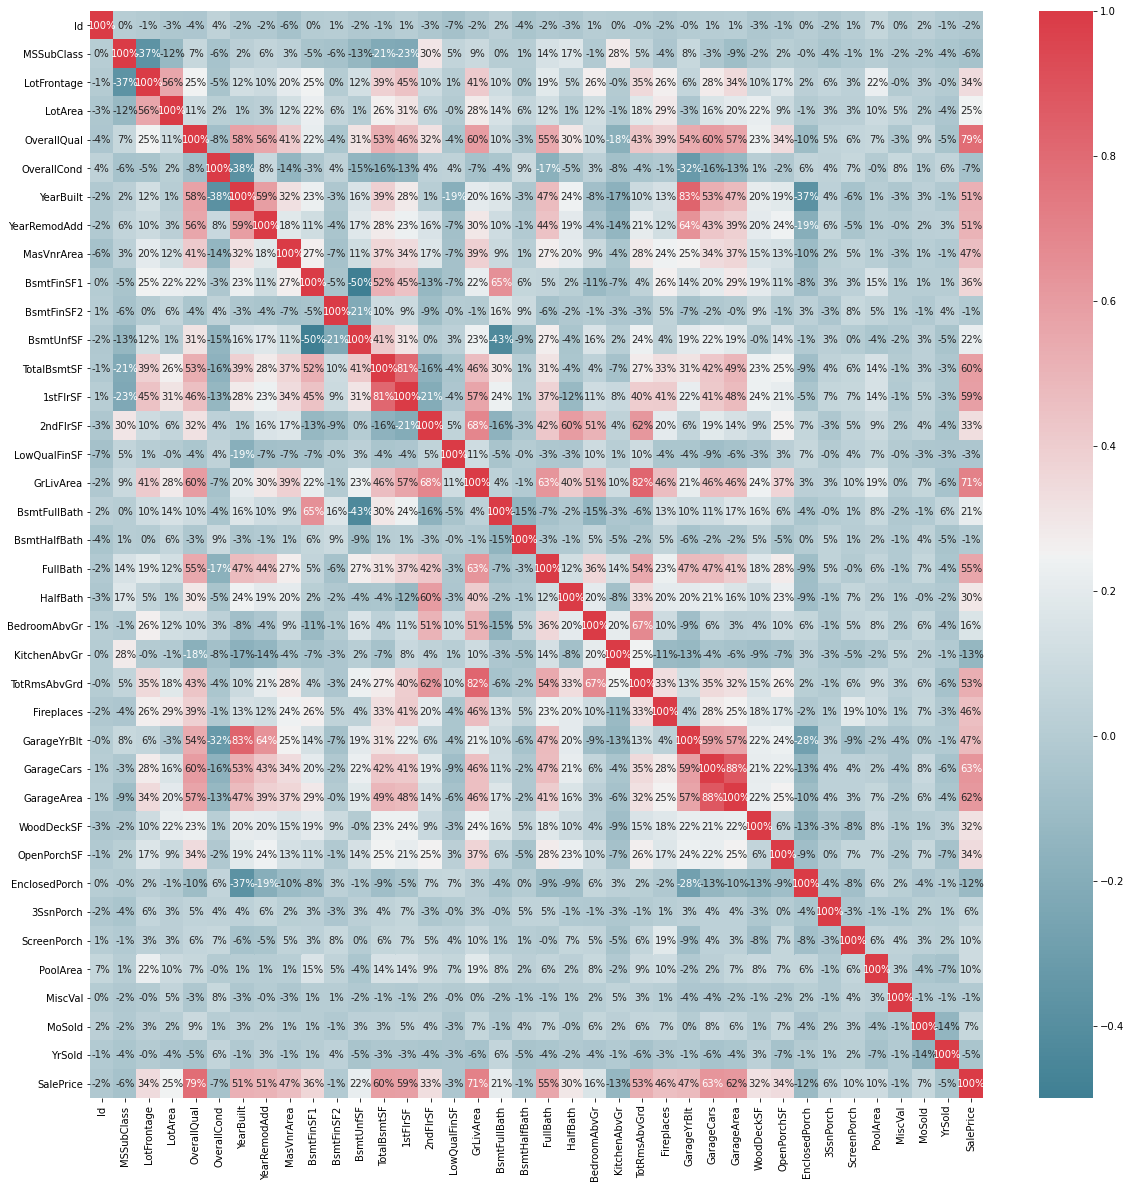

In [58]:
#checking correlation via visualization (heatmap)
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,fmt='.0%',cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

MSSubClass,OverallCond,KitchenAbvGr,EnclosedPorch and Yr Sold are the least/negatively correlated column with target('SalePrice') variable

OverallQual is highly correlated column with target variable followed by GrLivArea and other attributes.

## Vizualization

#### BIVARIATE ANALYSIS

- Checking the impact of each attribute on the 'SalePrice' using catplot

<Figure size 720x432 with 0 Axes>

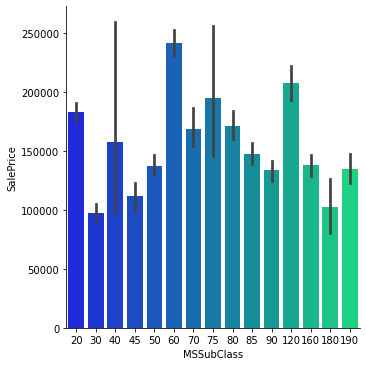

<Figure size 720x432 with 0 Axes>

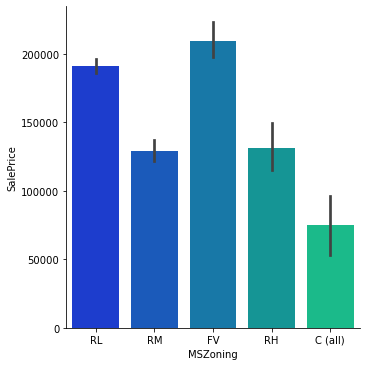

<Figure size 720x432 with 0 Axes>

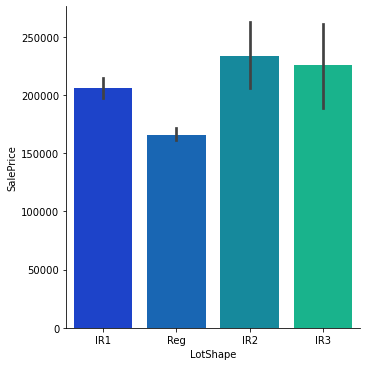

<Figure size 720x432 with 0 Axes>

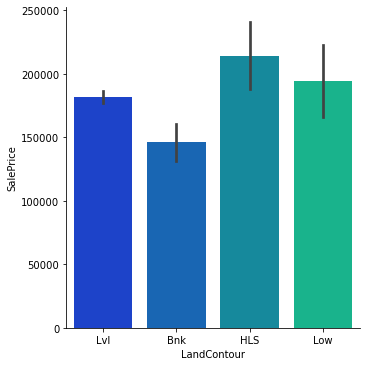

<Figure size 720x432 with 0 Axes>

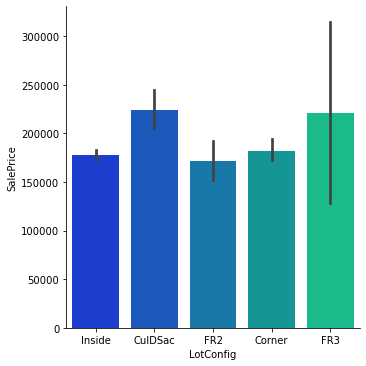

<Figure size 720x432 with 0 Axes>

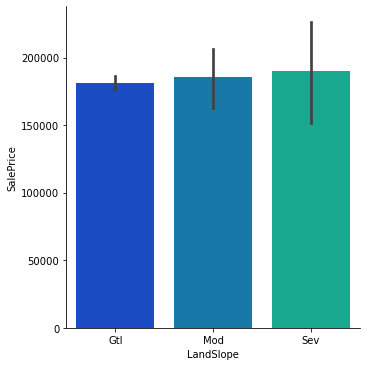

<Figure size 720x432 with 0 Axes>

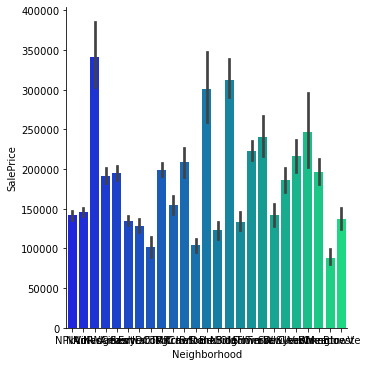

<Figure size 720x432 with 0 Axes>

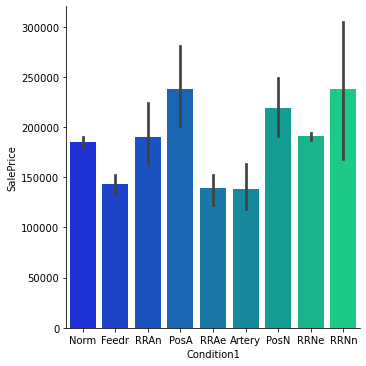

<Figure size 720x432 with 0 Axes>

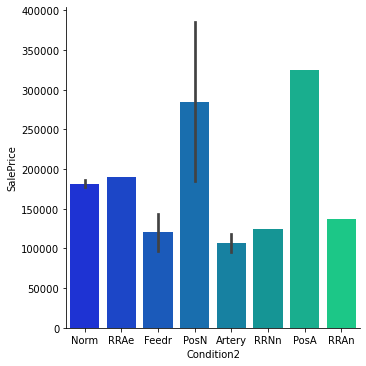

<Figure size 720x432 with 0 Axes>

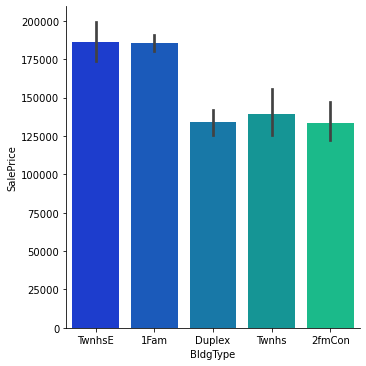

<Figure size 720x432 with 0 Axes>

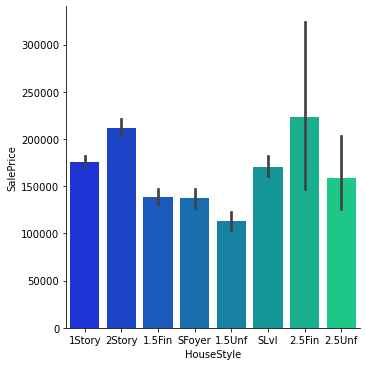

<Figure size 720x432 with 0 Axes>

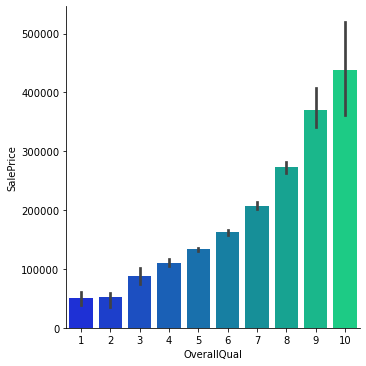

<Figure size 720x432 with 0 Axes>

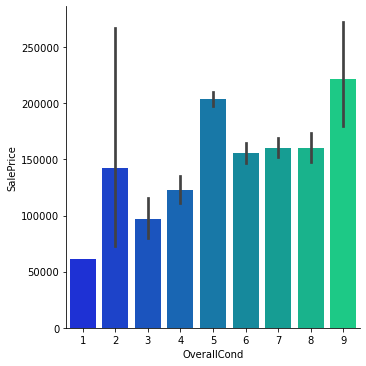

<Figure size 720x432 with 0 Axes>

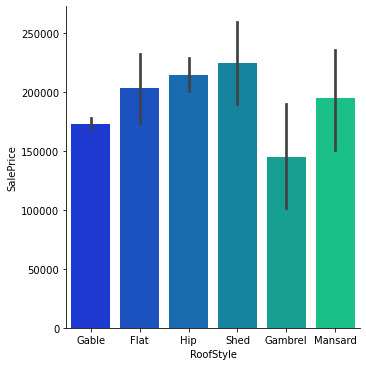

<Figure size 720x432 with 0 Axes>

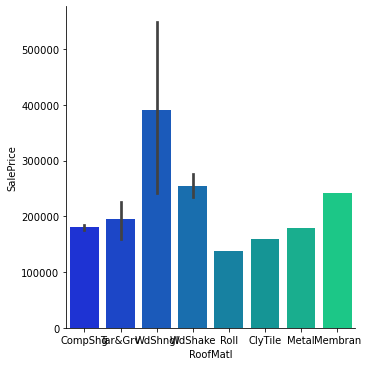

<Figure size 720x432 with 0 Axes>

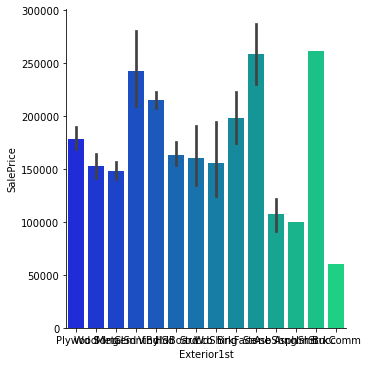

<Figure size 720x432 with 0 Axes>

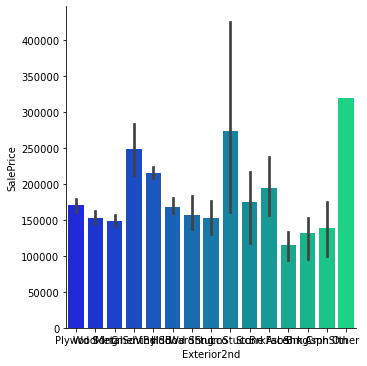

<Figure size 720x432 with 0 Axes>

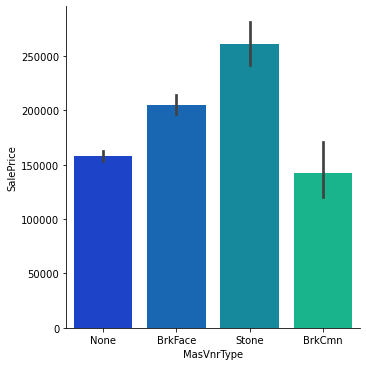

<Figure size 720x432 with 0 Axes>

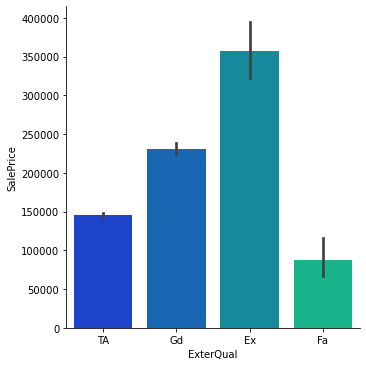

<Figure size 720x432 with 0 Axes>

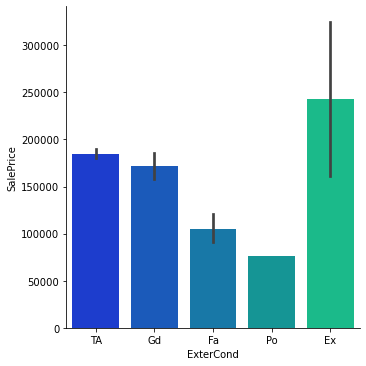

<Figure size 720x432 with 0 Axes>

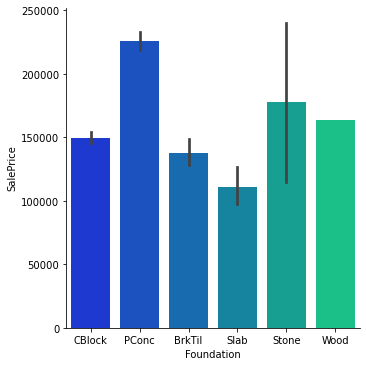

<Figure size 720x432 with 0 Axes>

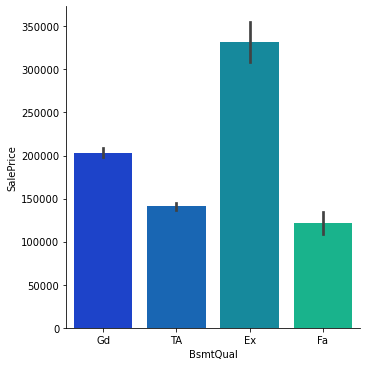

<Figure size 720x432 with 0 Axes>

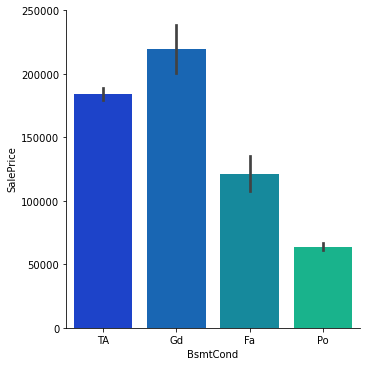

<Figure size 720x432 with 0 Axes>

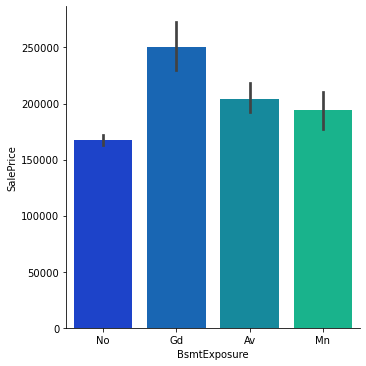

<Figure size 720x432 with 0 Axes>

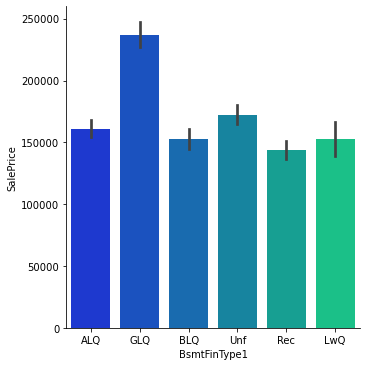

<Figure size 720x432 with 0 Axes>

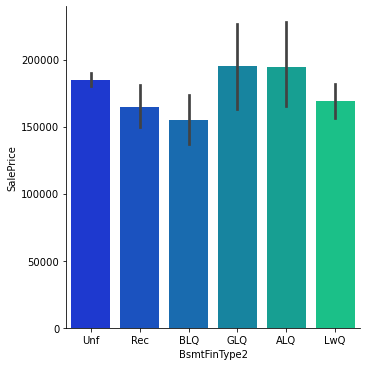

<Figure size 720x432 with 0 Axes>

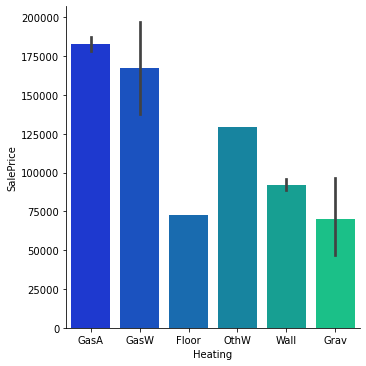

<Figure size 720x432 with 0 Axes>

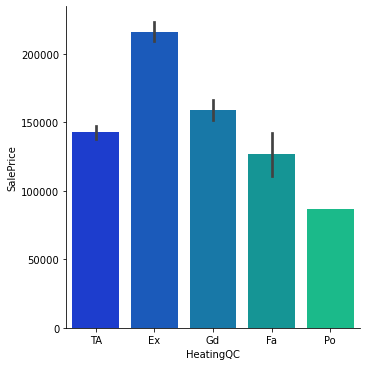

<Figure size 720x432 with 0 Axes>

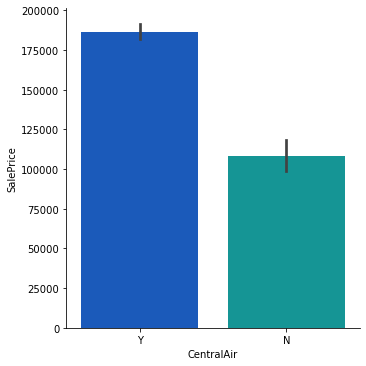

<Figure size 720x432 with 0 Axes>

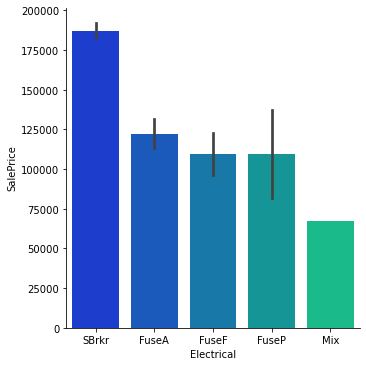

<Figure size 720x432 with 0 Axes>

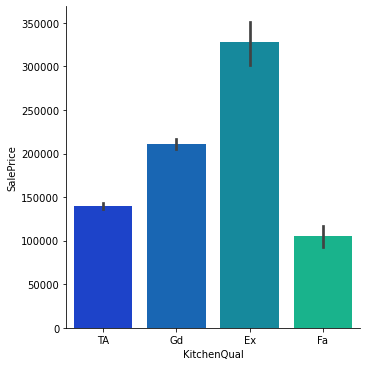

<Figure size 720x432 with 0 Axes>

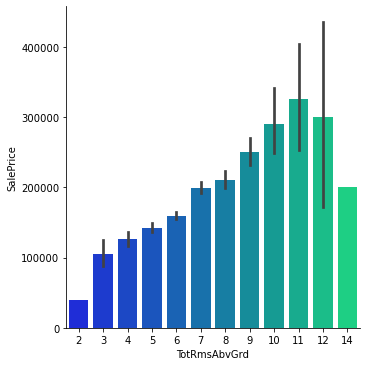

<Figure size 720x432 with 0 Axes>

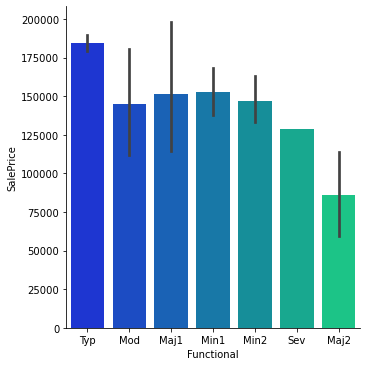

<Figure size 720x432 with 0 Axes>

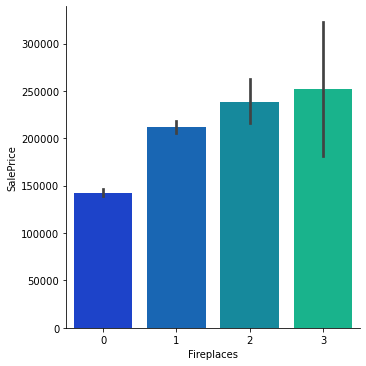

<Figure size 720x432 with 0 Axes>

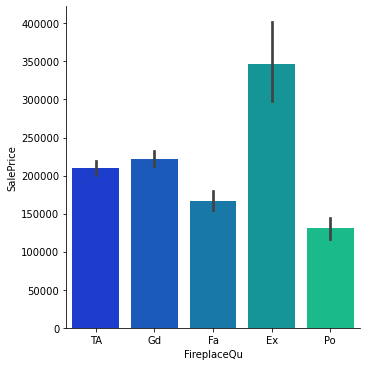

<Figure size 720x432 with 0 Axes>

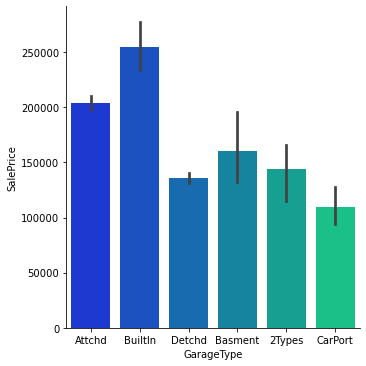

<Figure size 720x432 with 0 Axes>

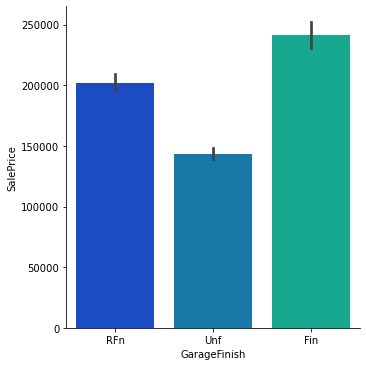

<Figure size 720x432 with 0 Axes>

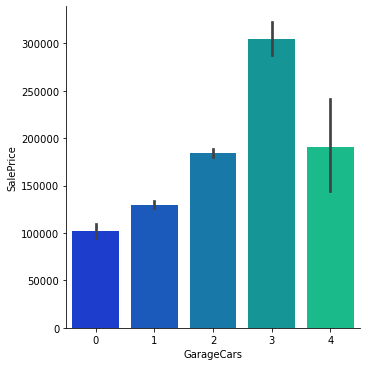

<Figure size 720x432 with 0 Axes>

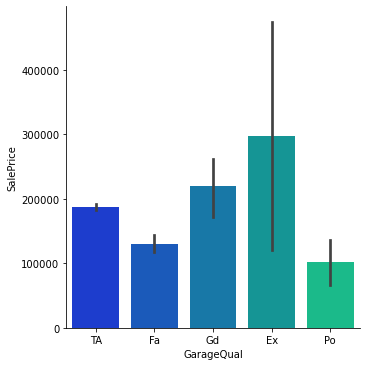

<Figure size 720x432 with 0 Axes>

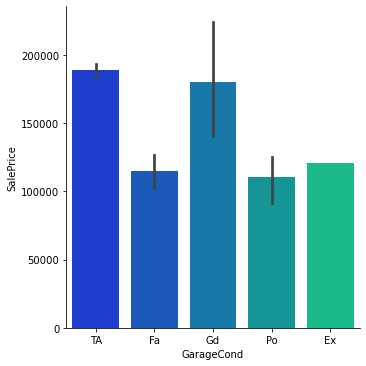

<Figure size 720x432 with 0 Axes>

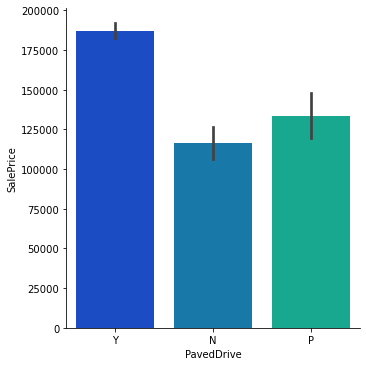

<Figure size 720x432 with 0 Axes>

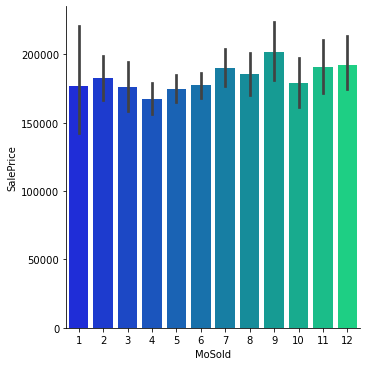

<Figure size 720x432 with 0 Axes>

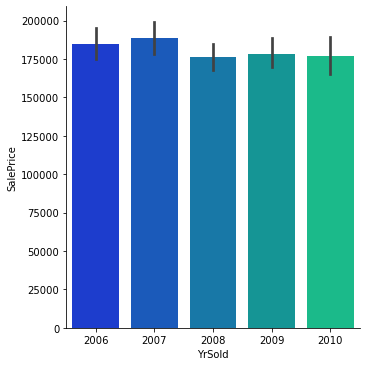

<Figure size 720x432 with 0 Axes>

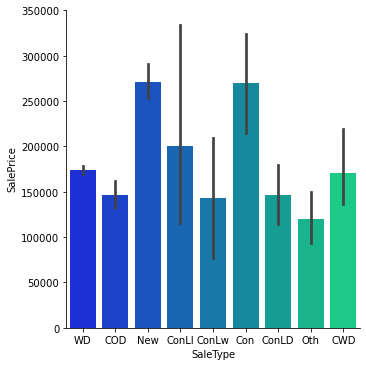

<Figure size 720x432 with 0 Axes>

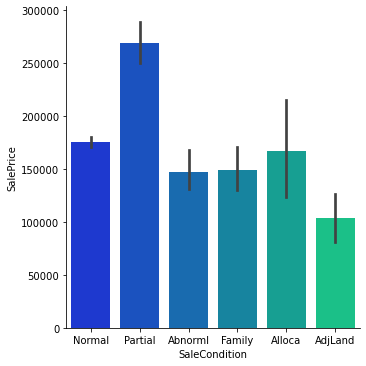

In [12]:
l=['MSSubClass', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageCars',  'GarageQual',
       'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
for i in l:
    plt.figure(figsize=(10,6))
    sns.catplot(y='SalePrice', x=i, data=train, kind="bar", palette='winter')
    plt.show()

<AxesSubplot:title={'center':'SalePrice and LotArea'}, xlabel='SalePrice', ylabel='LotArea'>

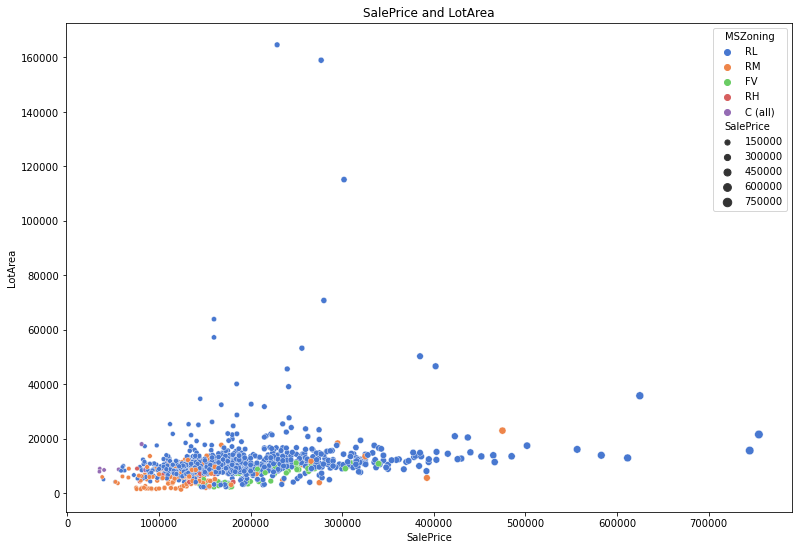

In [13]:
plt.figure(figsize=(13,9))
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.title('SalePrice and LotArea')
sns.scatterplot(x='SalePrice',y='LotArea',hue='MSZoning',size='SalePrice',data=train,palette = "muted")

Text(0.5, 1.0, 'House Price vs YearSold')

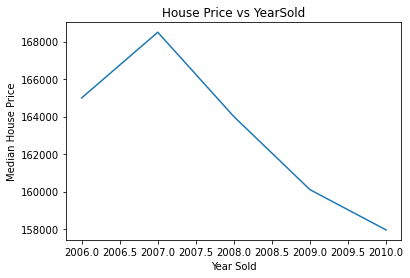

In [14]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

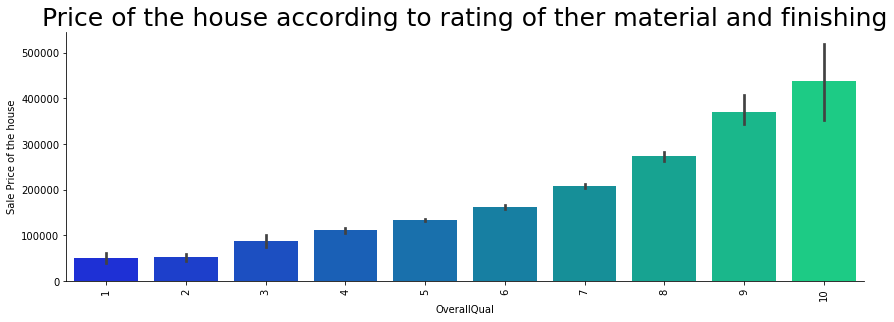

In [15]:
#Factor plot of OverallQual vs SalePrice
sns.factorplot(x="OverallQual",y="SalePrice",data=train,kind="bar",size = 4,palette = "winter",aspect=3)
plt.title('Price of the house according to rating of ther material and finishing',fontsize=25)
plt.ylabel("Sale Price of the house")
plt.xticks(rotation=90)
plt.show()

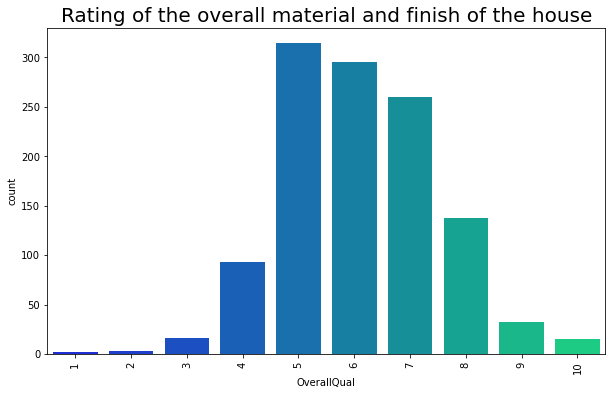

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


In [16]:
plt.figure(figsize=(10,6))
sns.countplot(train['OverallQual'],palette= 'winter')
plt.title("Rating of the overall material and finish of the house",fontsize=20)
plt.xticks(rotation=90)
plt.show()

print(train.OverallQual.value_counts())

#### Observations

- Least SalePrice is for 30:1-STORY 1945 & OLDER and maximum for 60:2-STORY 1946 & NEWER

- In MSZoing maximum is for category 1 i.e, Floating Village Residential


- Lotshape 1 and 2 have almost similar price and 3 has least.


- Landconotur corresponding to 1 i.e, HLS	Hillside - Significant slope from side to side has maximum price.


- Lotconfig corresponding to 1 and 3 have similar price.


- Neighborhoot with (15)NPkVill	Northpark Villa has maximum sales price and (10)IDOTRR	Iowa DOT and Rail Road has least.


- Normal condition houses have highest saleprice


- 1Fam	Single-family Detached and TwnhsI	Townhouse Inside Unit have maximum saleprice.


- In HouseStyle category 3: 2Story	Two story has max sale price.
  
  
- In OverallQual: SalePrice increase as Ratings increase. 


- Similary for OverallCond 5 and 9 have max sale price


- In RoofStyle 5:Shed has maximum.    


- In Exterior1st 6:HardBoard and 9:Other have Saleprice


- In Exterior2nd 8:MetalSd	Metal Siding      


- In MasVnrType, 3:stone has max saleprice and 0:BrkCmn	Brick Common has least


- In ExterQual 0:Excellent has maximum price. Similary for ExterCond


- In Foundation 2:PConc	Poured Contrete has max price


- In BsmtQual 0: Ex	Excellent (100+ inches), In BsmtCond 1: Gd	Good, In BsmtExposure 1:
       Av	Average Exposure (split levels or foyers typically score average or above) have max sale prices
    
    
- In BsmtFinType1: Rating of basement finished area - 2:GLQ	Good Living Quarters has max price


- In HeatingQC: Heating quality and condition 0:Ex	Excellent has max price.


- Houses with CentralAir has higher saleprice 


- In FireplaceQu: Fireplace quality 0:Ex	Excellent - Exceptional Masonry Fireplace has max saleprice


- GarageType 3:BuiltIn	Built-In (Garage part of house - typically has room above garage) has max saleprice


- Finished Garage has more price


- Paved Driveway has more price


- In 2007 maximum houses are sold followed by 2006


- In saletype category 2 and 6 have max sale price


- Normal sale condition has max price.    

## Feature Engineering

#### Combining the train and test data for performing feature engineering

In [17]:
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])
df.shape

(1460, 82)

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,test,NaN
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,test,NaN
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,test,NaN
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,test,NaN
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,test,NaN


In [19]:
#checking the null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Treating the null values

In [20]:
# imputing the integer type columns with null values using Simple Imputer(mean)

list=['LotFrontage','GarageYrBlt','MasVnrArea']
imp=SimpleImputer(strategy='mean')
for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [21]:
# Checking nan values for categorical columns

for column in df.columns:
    if df[column].dtype==object:
        print(str(column))
        count_nan_in_df = df[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_df))
        print('\n')

MSZoning
Count of NaN: 0


Street
Count of NaN: 0


Alley
Count of NaN: 1369


LotShape
Count of NaN: 0


LandContour
Count of NaN: 0


Utilities
Count of NaN: 0


LotConfig
Count of NaN: 0


LandSlope
Count of NaN: 0


Neighborhood
Count of NaN: 0


Condition1
Count of NaN: 0


Condition2
Count of NaN: 0


BldgType
Count of NaN: 0


HouseStyle
Count of NaN: 0


RoofStyle
Count of NaN: 0


RoofMatl
Count of NaN: 0


Exterior1st
Count of NaN: 0


Exterior2nd
Count of NaN: 0


MasVnrType
Count of NaN: 8


ExterQual
Count of NaN: 0


ExterCond
Count of NaN: 0


Foundation
Count of NaN: 0


BsmtQual
Count of NaN: 37


BsmtCond
Count of NaN: 37


BsmtExposure
Count of NaN: 38


BsmtFinType1
Count of NaN: 37


BsmtFinType2
Count of NaN: 38


Heating
Count of NaN: 0


HeatingQC
Count of NaN: 0


CentralAir
Count of NaN: 0


Electrical
Count of NaN: 1


KitchenQual
Count of NaN: 0


Functional
Count of NaN: 0


FireplaceQu
Count of NaN: 690


GarageType
Count of NaN: 81


GarageFinish
Count of

The following columns have NaN values which can be imputed

- 'Alley'
- 'PoolQC'
- 'MiscFeature'
- 'Fence'
- 'MasVnrType'
- 'BsmtQual'
- 'BsmtCond'
- 'BsmtExposure'
- 'BsmtFinType1'
- 'BsmtFinType2'
- 'FireplaceQu'
- 'GarageType'
- 'GarageFinish'
- 'GarageQual'
- 'GarageCond'

The following attributes should be dropped because they hae 50% NaN values. 
- 'Alley'
- 'PoolQC'
- 'MiscFeature'
- 'Fence' 

In [22]:
# Dropping the columns 'Alley','PoolQC','MiscFeature','Fence' 
df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [23]:
# Imputing the columns with object data types to treat nan values with Simple Imputer (mode)
list=['MasVnrType','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond']
imp=SimpleImputer(strategy='most_frequent')
for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df.isnull().sum().sum()

293

#### Label Encoding

In [25]:
#Encoding the columns with object data type using label encoder

le=LabelEncoder() 
for column in df.columns:
    if df[column].dtype==object:
        df[column]=le.fit_transform(df[column].astype(str))

In [26]:
# Dropping the column 'Street' because the data is extremly imbalanced 
df.drop(['Street','Utilities'],axis=1,inplace=True)

#### Splitting the train and test data to perform training

In [27]:
test, train = df[df["ind"].eq(0)], df[df["ind"].eq(1)]

In [28]:
test = test.drop(['ind','SalePrice'], axis=1)

In [29]:
train = train.drop(['ind'], axis=1)

In [30]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,3,86.000000,14157,0,1,0,0,22,2,2,0,2,9,5,2005,2006,3,1,12,13,3,200.0,2,4,2,0,3,1,2,1249,5,0,673,1922,1,0,1,4,1922,0,0,1922,1,0,2,0,3,1,2,8,6,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,0,7,2007,8,4
1,1018,120,3,70.049958,5814,0,3,1,0,22,2,2,4,2,8,5,1984,1984,1,1,6,6,2,0.0,2,4,1,2,3,0,2,1036,5,0,184,1220,1,2,1,4,1360,0,0,1360,1,0,1,0,1,1,2,4,6,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,0,8,2009,0,0
2,929,20,3,70.049958,11838,3,3,4,0,5,2,2,0,2,8,5,2001,2001,3,1,12,13,2,0.0,2,4,2,2,3,0,5,0,5,0,1753,1753,1,0,1,4,1788,0,0,1788,0,0,2,0,3,1,0,7,6,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,0,6,2009,8,4
3,1148,70,3,75.000000,12000,3,0,4,0,6,2,2,0,5,7,7,1941,1950,1,1,8,8,2,0.0,3,4,1,3,3,3,4,275,5,0,429,704,1,0,1,4,860,704,0,1564,0,0,1,1,3,1,1,7,6,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,0,7,2009,8,4
4,1227,60,3,86.000000,14598,0,3,1,0,21,1,2,0,5,6,5,2007,2007,1,1,12,13,3,74.0,2,4,2,2,3,2,5,0,5,0,894,894,1,0,1,4,894,1039,0,1933,0,0,2,1,4,1,2,9,6,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,0,1,2008,8,4


In [31]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.049958,4928,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,9,10,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000.0
1,889,20,3,95.000000,15865,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,13,14,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,10,2007,8,4,268000.0
2,793,60,3,92.000000,9920,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,8,8,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790.0
3,110,20,3,105.000000,11751,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,9,10,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000.0
4,422,20,3,70.049958,16635,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,5,5,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,6,2009,8,4,215000.0


### Data Wrangling

In [32]:
collist = train.columns.values
nrows=75
ncol=1

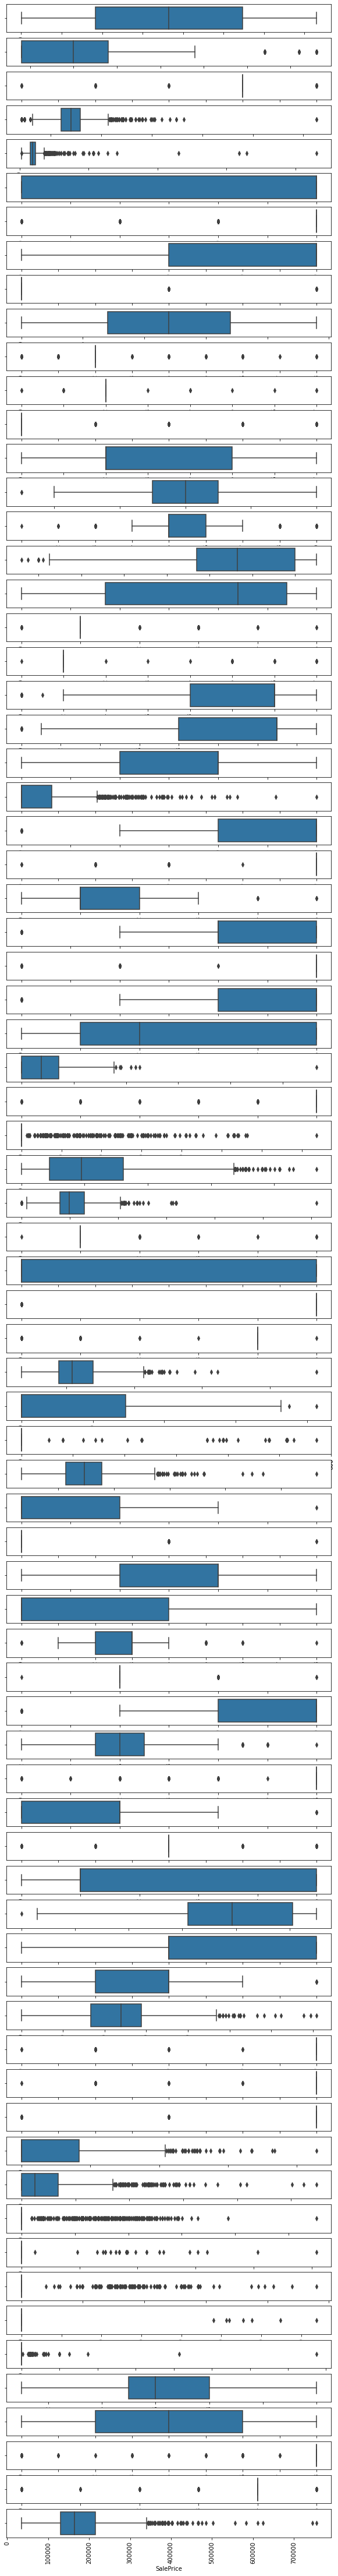

In [33]:
fig, axes = plt.subplots(figsize=(10, 80))

for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]])
    plt.xticks(rotation=90)

#### Treating the outliers

In [34]:
z=np.abs(zscore(train))

threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 8, 19, 33, ..., 38, 61, 62], dtype=int64))


In [35]:
train_new = train[(z<3).all(axis=1)]
train_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.049958,4928,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,9,10,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000.0
2,793,60,3,92.000000,9920,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,8,8,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790.0
5,1197,60,3,58.000000,14054,0,3,4,0,8,2,2,0,5,7,5,2006,2006,1,1,12,13,2,0.0,2,4,2,2,3,0,5,0,5,0,879,879,1,0,1,4,879,984,0,1863,0,0,2,1,4,1,2,9,6,1,2,3,2006.0,0,3,660,4,4,2,100,17,0,0,0,0,0,11,2006,6,5,219210.0
6,561,20,3,70.049958,11341,0,3,4,0,19,2,2,0,2,5,6,1957,1996,3,1,13,14,1,180.0,3,4,1,2,3,3,0,1302,5,0,90,1392,1,4,1,4,1392,0,0,1392,1,0,1,1,3,1,3,5,4,1,2,5,1957.0,2,2,528,4,4,2,0,0,0,0,95,0,0,5,2010,8,4,121500.0
11,833,60,3,44.000000,9548,0,3,1,0,5,2,2,0,5,7,6,2003,2003,1,1,12,13,1,223.0,2,4,2,2,3,3,2,483,5,0,458,941,1,0,1,4,941,888,0,1829,1,0,2,1,3,1,2,7,6,1,4,1,2003.0,1,2,613,4,4,2,192,39,0,0,0,0,0,1,2010,8,4,237000.0


In [36]:
#685 rows have been removed
train_new.shape

(483, 75)

## Model Training

In [37]:
# Splitting data into input and output variable
x = train_new.drop(['SalePrice'],axis=1)
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3,70.049958,4928,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,9,10,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2007,8,4
2,793,60,3,92.000000,9920,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,8,8,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,6,2007,8,4
5,1197,60,3,58.000000,14054,0,3,4,0,8,2,2,0,5,7,5,2006,2006,1,1,12,13,2,0.0,2,4,2,2,3,0,5,0,5,0,879,879,1,0,1,4,879,984,0,1863,0,0,2,1,4,1,2,9,6,1,2,3,2006.0,0,3,660,4,4,2,100,17,0,0,0,0,0,11,2006,6,5
6,561,20,3,70.049958,11341,0,3,4,0,19,2,2,0,2,5,6,1957,1996,3,1,13,14,1,180.0,3,4,1,2,3,3,0,1302,5,0,90,1392,1,4,1,4,1392,0,0,1392,1,0,1,1,3,1,3,5,4,1,2,5,1957.0,2,2,528,4,4,2,0,0,0,0,95,0,0,5,2010,8,4
11,833,60,3,44.000000,9548,0,3,1,0,5,2,2,0,5,7,6,2003,2003,1,1,12,13,1,223.0,2,4,2,2,3,3,2,483,5,0,458,941,1,0,1,4,941,888,0,1829,1,0,2,1,3,1,2,7,6,1,4,1,2003.0,1,2,613,4,4,2,192,39,0,0,0,0,0,1,2010,8,4


In [38]:
#scaling the input data

sc=StandardScaler()
x=sc.fit_transform(x)

In [39]:
x=pd.DataFrame(x)

In [40]:
x.columns=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [41]:
#target column
y=train_new['SalePrice'].values

In [42]:
x.shape, y.shape

((483, 74), (483,))

In [43]:
y=y.reshape(-1,1)
y.shape

(483, 1)

In [44]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42) 

In [45]:
#checking the shape of training and testing data
print(x_train.shape,x_test.shape)

(386, 74) (97, 74)


In [46]:
print(y_train.shape,y_test.shape)

(386, 1) (97, 1)


In [47]:
#All algorithms using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),
       KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    Score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',Score)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('****************************************')
    print('\n')

Score of LinearRegression() is: 0.9187675951179062
Mean Absolute Error: 13464.434728536515
Mean Squared Error: 290495359.4294943
RMSE: 17043.924413980905
r2_score: 0.9014700043946908
****************************************


Score of Lasso() is: 0.9187657177524203
Mean Absolute Error: 13461.776086153885
Mean Squared Error: 290424189.6723706
RMSE: 17041.8364524593
r2_score: 0.9014941436989138
****************************************


Score of Ridge() is: 0.9187529205971545
Mean Absolute Error: 13426.299646173986
Mean Squared Error: 288310634.13551193
RMSE: 16979.712427939172
r2_score: 0.9022110178622988
****************************************


Score of ElasticNet() is: 0.8987696090391082
Mean Absolute Error: 13873.574725877297
Mean Squared Error: 296174002.13420385
RMSE: 17209.706625454248
r2_score: 0.8995439266706335
****************************************


Score of SVR() is: -0.01761613167940035
Mean Absolute Error: 43258.27556794618
Mean Squared Error: 3026056118.4631157
RMSE: 

#### The top three scores are

- Lassso : 0.9014941436989138
- Ridge : 0.9022110178622988
- Gradient Boost : 0.907214289788861

Gradient Boost Regressor is the best performing model since it's giving best score.


It also gives a satisfactory r2_score hence the model is neither underfitting nor overfitting.

### Hyperparameter Tuning

In [48]:
#Using GridSearchCV for hyper parameter tuning of GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 350}

In [49]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=250)
gbr.fit(x_train,y_train)
Sc=gbr.score(x_train,y_train)
predm=gbr.predict(x_test)
print('Score of',gbr,'is:',Sc)
print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
print('Mean Squared Error:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('r2_score:',r2_score(y_test,predm))

Score of GradientBoostingRegressor(n_estimators=250) is: 0.9963126920769413
Mean Absolute Error: 11672.636123801558
Mean Squared Error: 256037029.94564104
RMSE: 16001.157143958091
r2_score: 0.9131575544446406


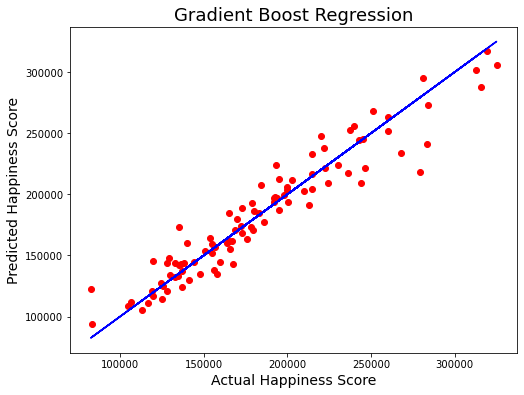

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predm, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Gradient Boost Regression',fontsize=18)
plt.show()

The model is performing better after hyperparameter tuning, hence the model can be finalised.

### Testing 

In [51]:
#Splitting data into input and output variable
x = test
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,3,86.000000,14157,0,1,0,0,22,2,2,0,2,9,5,2005,2006,3,1,12,13,3,200.0,2,4,2,0,3,1,2,1249,5,0,673,1922,1,0,1,4,1922,0,0,1922,1,0,2,0,3,1,2,8,6,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,0,7,2007,8,4
1,1018,120,3,70.049958,5814,0,3,1,0,22,2,2,4,2,8,5,1984,1984,1,1,6,6,2,0.0,2,4,1,2,3,0,2,1036,5,0,184,1220,1,2,1,4,1360,0,0,1360,1,0,1,0,1,1,2,4,6,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,0,8,2009,0,0
2,929,20,3,70.049958,11838,3,3,4,0,5,2,2,0,2,8,5,2001,2001,3,1,12,13,2,0.0,2,4,2,2,3,0,5,0,5,0,1753,1753,1,0,1,4,1788,0,0,1788,0,0,2,0,3,1,0,7,6,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,0,6,2009,8,4
3,1148,70,3,75.000000,12000,3,0,4,0,6,2,2,0,5,7,7,1941,1950,1,1,8,8,2,0.0,3,4,1,3,3,3,4,275,5,0,429,704,1,0,1,4,860,704,0,1564,0,0,1,1,3,1,1,7,6,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,0,7,2009,8,4
4,1227,60,3,86.000000,14598,0,3,1,0,21,1,2,0,5,6,5,2007,2007,1,1,12,13,3,74.0,2,4,2,2,3,2,5,0,5,0,894,894,1,0,1,4,894,1039,0,1933,0,0,2,1,4,1,2,9,6,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,0,1,2008,8,4


In [52]:
#predict the value
pred=gbr.predict(x)

In [53]:
print("Predicted result price:",pred)

Predicted result price: [371223.85182718 361300.87029979 327606.87417223 375956.51193448
 355350.9212931  378914.00453523 411867.41534426 370032.83872111
 409820.21303837 366273.67645151 315609.40211248 369404.79603059
 317051.33772082 372176.7393528  326757.06854213 384231.37460002
 344373.43489685 360753.50411315 387369.98238416 393845.34920929
 374450.51061277 317532.70936019 360991.22002048 346626.24743574
 361279.26716576 361300.87029979 349162.6270789  360726.83872664
 382736.55333345 321153.1207643  378715.36501395 365993.38532405
 361883.06728068 362297.28483717 313323.53299245 343292.84527163
 385707.32007098 376019.2172148  385649.30587995 375600.21674661
 355522.83934245 389543.90737455 348473.42542246 367105.72676789
 355430.52358747 377583.394557   350498.36912612 316771.71584357
 369615.24026471 377096.03119427 384081.34541688 414789.97868927
 339308.90610653 312584.35502381 345885.10148001 405412.3006688
 340546.23740546 349442.91820636 406738.73059078 328384.44396398
 4

In [54]:
#Saving the best model
import joblib
joblib.dump(gbr,'Housing_result.obj')

['Housing_result.obj']